In [150]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
from numpy import genfromtxt
from sklearn.cluster import DBSCAN

In [182]:
systoleFile = 'Systole BP Updated.xlsx'
writerSys = pd.ExcelWriter(systoleFile, engine = 'openpyxl')
diastoleFile = 'Diastole BP Updated.xlsx'
writerDia = pd.ExcelWriter(diastoleFile, engine = 'openpyxl')

In [151]:
systolicBP = pd.read_csv('Systolic BP.csv')
diastolicBP = pd.read_csv('Diastolic BP.csv')

In [152]:
systole = pd.DataFrame(systolicBP)
diastole = pd.DataFrame(diastolicBP)

In [188]:
systole

,Zung Score,Blood Pressure
0,26.065231,125.953125
1,30.095773,135.921875
2,35.015473,136.265625
3,35.011529,134.031250
4,34.995752,125.093750
5,39.008394,124.921875
6,33.944074,115.984375
7,32.965918,111.859375
8,34.893710,103.953125
9,39.970773,120.109375


In [186]:
diastole

,Zung Score,Blood pressure
0,26.074209,77.244309
1,30.052148,87.297439
2,34.971259,88.348569
3,35.101341,81.249324
4,35.105250,76.227688
5,35.111585,68.089176
6,34.117438,65.142994
7,33.120324,66.006328
8,40.092434,69.833099
9,39.090198,77.276507


In [155]:
scoresSystole = systole["Zung Score"]
scoresDiastole = diastole["Zung Score"]

In [156]:
bpSystole = systole["Blood Pressure"]
bpDiastole = diastole["Blood pressure"]

In [157]:
def plotGraph(x, y, bpType):
    plt.scatter(x, y, c='b', marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType + ' BP', fontsize=20)
    plt.show()

In [163]:
def plotOutlier(data, x, y, bpType, myEps):
    bp_data = data.iloc[:, 0:2].values

    # DBSCAN model with parameters
    model = DBSCAN(eps=myEps, min_samples=3).fit(bp_data)
    print(model)
    colors = model.labels_
    plt.scatter(x, y, c=colors, marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType +' BP', fontsize=20)
    plt.show()

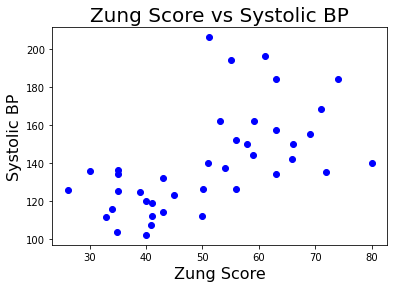

In [164]:
plotGraph(scoresSystole, bpSystole, 'Systolic')

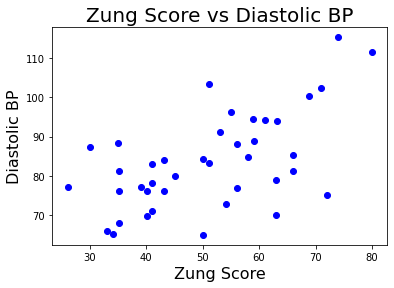

In [165]:
plotGraph(scoresDiastole, bpDiastole, 'Diastolic')

DBSCAN(eps=10, min_samples=3)


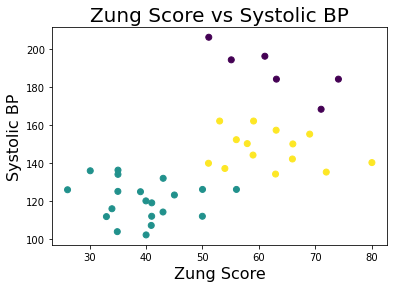

In [166]:
plotOutlier(systole, scoresSystole, bpSystole, 'Systolic', 10)

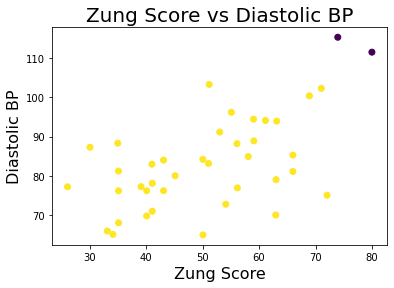

In [162]:
plotOutlier(diastole, scoresDiastole, bpDiastole, 'Diastolic', 12)

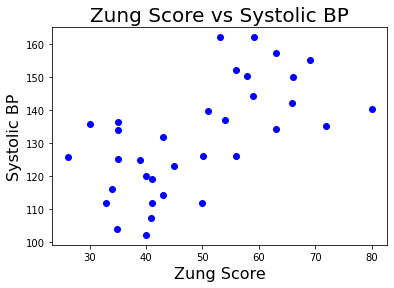

In [178]:
systoleParsed = systole['Blood Pressure'] < 167
systoleParsed = (systole[systoleParsed])
plotGraph(systoleParsed["Zung Score"], systoleParsed['Blood Pressure'], 'Systolic')

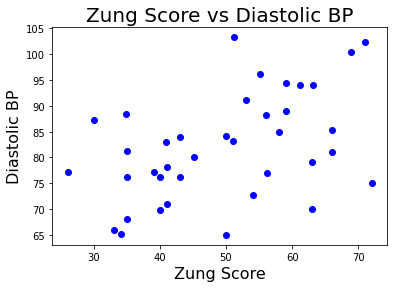

In [181]:
diastoleParsed = diastole['Blood pressure'] < 110
diastoleParsed = (diastole[diastoleParsed])
plotGraph(diastoleParsed["Zung Score"], diastoleParsed['Blood pressure'], 'Diastolic')

In [185]:
diastoleParsed.to_excel(writerDia, index = False)
writerDia.save()

In [187]:
systoleParsed.to_excel(writerSys, index = False)
writerSys.save()